## Resumo:

Os dados disponibilizados pelo Brasil IO juntam em uma única fonte os dados de COVID consolidado por estado como separado por cidades. Um fato observado que as datas mais atuais são diferentes dos estados e municípios.<br>
Pontos de interesse encontrados:
1. O número de municípios com dados na tabela é de 5.296 cidades, mas o Brasil tem 5570 municípios, conclui-se que não há todos os municípios do Brasil ou alguns municípios não tiveram a ocorrência de COVID-19;
2. Como o número de municípios é muito extensa escolhi os municípios do Estado do Rio de Janeiro. Logo identificamos uma linha com o nome Importados/Indefinidos na fonte de dados.
3. Em números absolutos, os números de São Paulo são desproporcionais ao resto dos estados. O número de óbitos de SP é quase 40 mil, enquanto o segundo maior tem pouco mais de 20 mil. O mesmo acontece com o número de casos confirmados, provavelmente é consequência de ser o estado mais populoso do país.
4. Quando o número de casos é relativo para cada 100 mil habitantes o cenário muda. O Distrito Federal fica discrepante do resto das unidades da federação no número de casos confirmados, os demais estão quase equilibrados em torno da média.
5. O que mais chamou atenção ao analisar os dados relativos foi o Estado do Rio de Janeiro. Para o número de casos confirmados distribuídos a cada 100 mil, ele se encontra entre os estados com menor índice, em compensação, é o segundo em número de óbitos relativos. Trazendo duas hipóteses:<br>
	a. Os casos estão sendo mais subnotificados que no resto do país<br>
	b. A situação hospitalar no RJ é pior que nos demais estados.<br>
Sendo morador do Rio de Janeiro, desconfio fortemente da primeira hipótese, uma vez que não houve comunicação da falência da estrutura de saúde, porém houve problemas com construção de hospitais de campanha.
6. O Estado do Rio de Janeiro também foi destaque quando fazemos análise da taxa de letalidade. Em adição às informações anteriores, mais hipóteses:<br>
	a. Pouco teste para confirmar a população doente, como resido no Rio, sei que os testes somente são feitos nos casos que procuram o hospital, logo somente são confirmados os casos mais graves.<br>
	b. Se o número de testes for adequado, outra explicação é a capacidade de resposta do sistema de saúde para os casos mais graves. (mais uma vez essa hipótese aparece)<br>
7. Nos gráficos de linha percebe-se um ruído muito grande com relação aos casos confirmados e de óbitos diários, mas com o uso de média móvel podemos suavizar a amplitude grande e perceber as tendências de alta e de queda. Observando que no Rio de Janeiro o mês com o maior número de óbitos foi em junho



## Análise dos dados:

# Análise COVID-19 com base dados Brasil IO

## Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# melhorar os gráficos do pyplot
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (14.562,9) #proporção áurea

## Importar os dados

In [3]:
dados = pd.read_csv('caso-covid-brasil-IO.csv')
dados

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
936865,2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000
936866,2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000
936867,2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000
936868,2020-06-20,SP,Óleo,city,1,0,2,False,2496.0,2471.0,3533809.0,40.46945,0.0000


## Confirmar os dados da tabela

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936870 entries, 0 to 936869
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            936870 non-null  object 
 1   state                           936870 non-null  object 
 2   city                            930535 non-null  object 
 3   place_type                      936870 non-null  object 
 4   confirmed                       936870 non-null  int64  
 5   deaths                          936870 non-null  int64  
 6   order_for_place                 936870 non-null  int64  
 7   is_last                         936870 non-null  bool   
 8   estimated_population_2019       933215 non-null  float64
 9   estimated_population            933215 non-null  float64
 10  city_ibge_code                  933215 non-null  float64
 11  confirmed_per_100k_inhabitants  919888 non-null  float64
 12  death_rate      

## Transformar coluna date de string em data

In [5]:
dados.date = pd.to_datetime(dados.date)
dados.date

0        2020-11-05
1        2020-11-04
2        2020-11-03
3        2020-11-02
4        2020-11-01
            ...    
936865   2020-06-23
936866   2020-06-22
936867   2020-06-21
936868   2020-06-20
936869   2020-06-19
Name: date, Length: 936870, dtype: datetime64[ns]

## Usar da coluna date como index

In [6]:
dados = dados.set_index('date')
dados.head()

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224


---

## Olhando a tabela, aparentemente misturaram estados e municipios

### Confirmar se todos os estados e municípios estão na base de dados

estados

In [7]:
dados.state.unique()

array(['AC', 'AP', 'AM', 'AL', 'DF', 'CE', 'ES', 'BA', 'MS', 'MA', 'GO',
       'MT', 'PA', 'PB', 'PE', 'PI', 'MG', 'RO', 'RJ', 'RN', 'PR', 'RR',
       'SE', 'SC', 'RS', 'TO', 'SP'], dtype=object)

municipios

In [8]:
dados.city.unique()

array([nan, 'Acrelândia', 'Assis Brasil', ..., 'Álvares Machado',
       'Álvaro de Carvalho', 'Óleo'], dtype=object)

In [9]:
len(dados.city.unique())

5296

### Sabendo que há 5570 municípios, conclui-se que não há todos os municípios do Brasil ou alguns municípios não tiveram a ocorrência de COVID-19

---

### Ver se há mais tipos

In [10]:
dados.place_type.unique()

array(['state', 'city'], dtype=object)

In [11]:
dados[dados.city.isna()].place_type.unique()

array(['state'], dtype=object)

### Confirmado
### Há duas informações na mesma tabela:
### As informações de estados e municípios na mesma tabela

---

## Separar as informações em 2 dataframes

In [12]:
dados_estados = dados[dados.city.isna()]
dados_estados

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-11-05,AC,NaN,state,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223
2020-11-04,AC,NaN,state,31218,696,233,False,881935.0,894470.0,12.0,3490.11146,0.0223
2020-11-03,AC,NaN,state,30962,695,232,False,881935.0,894470.0,12.0,3461.49116,0.0224
2020-11-02,AC,NaN,state,30954,693,231,False,881935.0,894470.0,12.0,3460.59678,0.0224
2020-11-01,AC,NaN,state,30951,693,230,False,881935.0,894470.0,12.0,3460.26138,0.0224
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0000
2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0000
2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0000


In [13]:
dados_municipios = dados[np.invert(dados.city.isna())]
dados_municipios

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-11-05,AC,Acrelândia,city,492,11,211,True,15256.0,15490.0,1200013.0,3176.24274,0.0224
2020-11-04,AC,Acrelândia,city,492,11,210,False,15256.0,15490.0,1200013.0,3176.24274,0.0224
2020-11-03,AC,Acrelândia,city,492,11,209,False,15256.0,15490.0,1200013.0,3176.24274,0.0224
2020-11-02,AC,Acrelândia,city,492,10,208,False,15256.0,15490.0,1200013.0,3176.24274,0.0203
2020-11-01,AC,Acrelândia,city,492,10,207,False,15256.0,15490.0,1200013.0,3176.24274,0.0203
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000


In [14]:
dados_municipios.city.isna().sum()

0

---

### Checar se os dados são cumulativos ou não

<AxesSubplot:xlabel='date'>

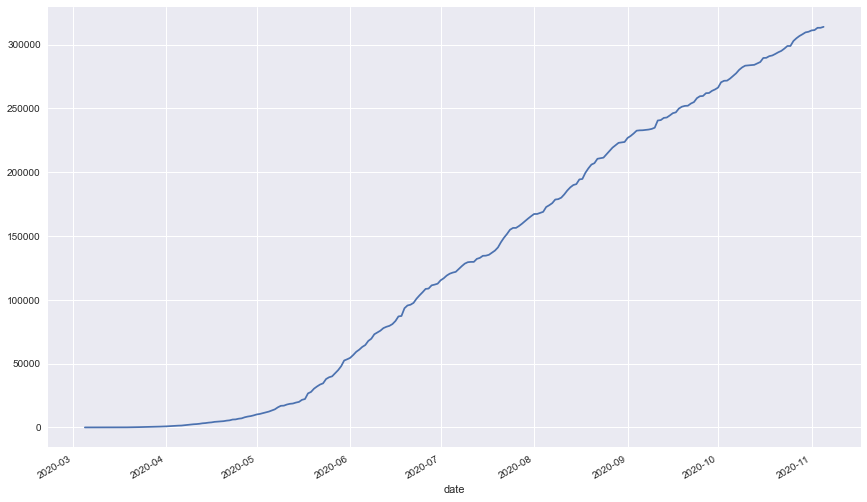

In [15]:
dados_estados[dados_estados.state == 'RJ'].confirmed.plot()

### São cumulativos, então podemos fazer análise de evolução e também quantidade até o momento somente usando a última data disponível

---

## Analisando os dados por estado

In [16]:
dados_estados = dados_estados.sort_values('date')
dados_estados.head()

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-02-25,SP,NaN,state,1,0,1,False,45919049.0,46289333.0,35.0,0.00216,0.0
2020-02-26,SP,NaN,state,1,0,2,False,45919049.0,46289333.0,35.0,0.00216,0.0
2020-02-27,SP,NaN,state,1,0,3,False,45919049.0,46289333.0,35.0,0.00216,0.0
2020-02-28,SP,NaN,state,2,0,4,False,45919049.0,46289333.0,35.0,0.00432,0.0
2020-02-29,SP,NaN,state,2,0,5,False,45919049.0,46289333.0,35.0,0.00432,0.0


In [17]:
dados_estados = dados_estados.drop(['city', 'place_type'], axis=1)

In [18]:
dados_estados.tail()

,state,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-11-05,SC,268644,3173,239,True,7164788.0,7252502.0,42.0,3704.15617,0.0118
2020-11-05,MT,145644,3896,228,True,3484466.0,3526220.0,51.0,4130.31518,0.0268
2020-11-05,RO,72630,1470,222,True,1777225.0,1796460.0,11.0,4042.95114,0.0202
2020-11-05,GO,260133,5869,239,True,7018354.0,7113540.0,52.0,3656.87126,0.0226
2020-11-05,AC,31248,697,234,True,881935.0,894470.0,12.0,3493.46540,0.0223


In [19]:
ultimo_dia = dados_estados.index[-1]

### Última data é 05/11/2020

In [20]:
dados_estados.loc[ultimo_dia]

,state,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-11-05,PA,256139,6779,233,True,8602865.0,8690745.0,15.0,2947.26171,0.0265
2020-11-05,RJ,313843,20849,236,True,17264943.0,17366189.0,33.0,1807.20710,0.0664
2020-11-05,PI,115825,2459,231,True,3273227.0,3281480.0,22.0,3529.65735,0.0212
2020-11-05,PB,134297,3138,239,True,4018127.0,4039277.0,25.0,3324.77817,0.0234
2020-11-05,AM,164070,4607,234,True,4144597.0,4207714.0,13.0,3899.26692,0.0281
2020-11-05,PR,217175,5293,237,True,11433957.0,11516840.0,41.0,1885.71692,0.0244
2020-11-05,PE,164222,8687,239,True,9557071.0,9616621.0,26.0,1707.68922,0.0529
2020-11-05,AL,91270,2258,240,True,3337357.0,3351543.0,27.0,2723.22330,0.0247
2020-11-05,RS,254828,5954,237,True,11377239.0,11422973.0,43.0,2230.83780,0.0234


In [21]:
print("O número total de casos confirmados é de {:,.0f}.".format(dados_estados.loc[ultimo_dia].confirmed.sum()))
print("O número total de óbitos é de {:,.0f}.".format(dados_estados.loc[ultimo_dia].deaths.sum()))

O número total de casos confirmados é de 5,263,129.
O número total de óbitos é de 155,053.


## Situação de casos confirmados do início até dia 05/11/2020

In [22]:
situacao_atual_estado = dados_estados.loc[ultimo_dia]
situacao_atual_estado

,state,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-11-05,PA,256139,6779,233,True,8602865.0,8690745.0,15.0,2947.26171,0.0265
2020-11-05,RJ,313843,20849,236,True,17264943.0,17366189.0,33.0,1807.20710,0.0664
2020-11-05,PI,115825,2459,231,True,3273227.0,3281480.0,22.0,3529.65735,0.0212
2020-11-05,PB,134297,3138,239,True,4018127.0,4039277.0,25.0,3324.77817,0.0234
2020-11-05,AM,164070,4607,234,True,4144597.0,4207714.0,13.0,3899.26692,0.0281
2020-11-05,PR,217175,5293,237,True,11433957.0,11516840.0,41.0,1885.71692,0.0244
2020-11-05,PE,164222,8687,239,True,9557071.0,9616621.0,26.0,1707.68922,0.0529
2020-11-05,AL,91270,2258,240,True,3337357.0,3351543.0,27.0,2723.22330,0.0247
2020-11-05,RS,254828,5954,237,True,11377239.0,11422973.0,43.0,2230.83780,0.0234


In [23]:
situacao_atual_estado = situacao_atual_estado.sort_values("confirmed", ascending=False)
situacao_atual_estado.head()

,state,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,
2020-11-05,SP,1125936,39717,253,True,45919049.0,46289333.0,35.0,2432.38761,0.0353
2020-11-05,MG,364541,9128,241,True,21168791.0,21292666.0,31.0,1712.04959,0.0250
2020-11-05,BA,359130,7731,243,True,14873064.0,14930634.0,29.0,2405.32318,0.0215
2020-11-05,RJ,313843,20849,236,True,17264943.0,17366189.0,33.0,1807.20710,0.0664
2020-11-05,CE,277072,9392,235,True,9132078.0,9187103.0,23.0,3015.87998,0.0339


## Gráficos de casos confirmados e óbitos

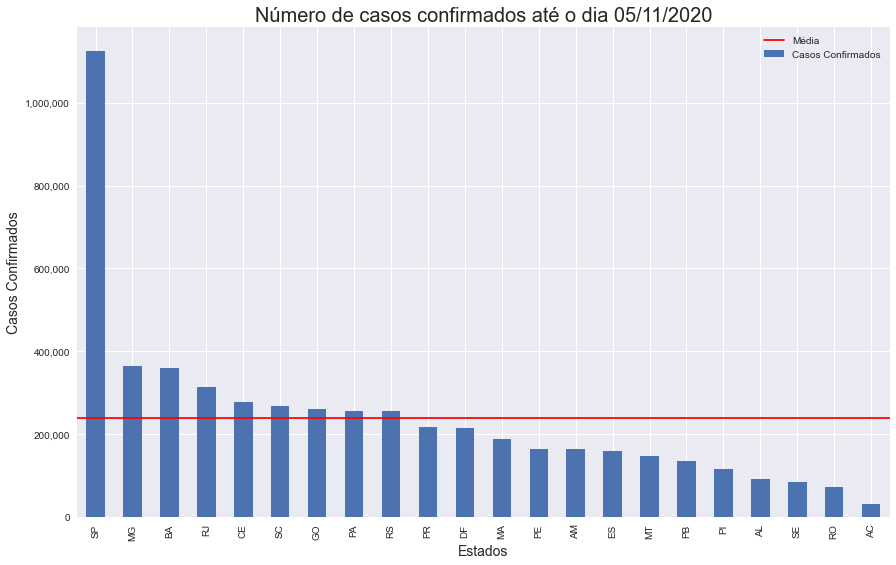

In [24]:
ax = situacao_atual_estado.plot(kind='bar', x='state', y='confirmed')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.axhline(y=situacao_atual_estado.confirmed.mean(), color='r')
plt.ylabel("Casos Confirmados",fontsize=14)
plt.xlabel("Estados", fontsize=14)
plt.title("Número de casos confirmados até o dia 05/11/2020", fontsize=20)
plt.legend(labels=["Média", "Casos Confirmados"])
plt.show()

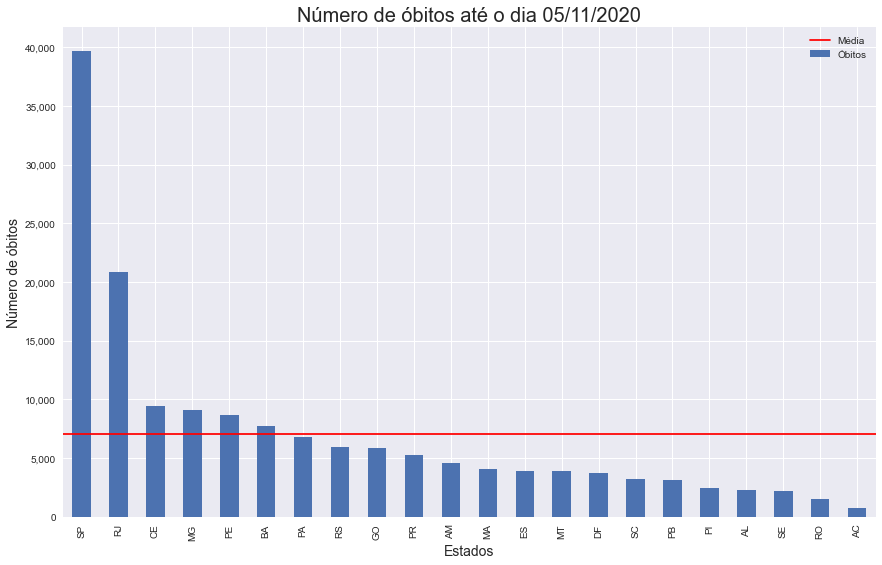

In [25]:
ax = situacao_atual_estado.sort_values("deaths", ascending=False).plot(kind='bar', x='state', y='deaths')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.axhline(y=situacao_atual_estado.deaths.mean(), color='r')
plt.ylabel("Número de óbitos",fontsize=14)
plt.xlabel("Estados", fontsize=14)
plt.title("Número de óbitos até o dia 05/11/2020", fontsize=20)
plt.legend(labels=['Média', "Óbitos"])
plt.show()

### São Paulo é o estado que tem mais casos confirmados e mais mortes, porém o que chama a atenção é que o segundo lugar de morte (RJ) é o quarto em casos e o terceiro lugar de mortes é o Ceará, que é o 5º de casos confirmados.
### Os números de SP, RJ, CE, MG, PE e BA estão acima da média do número absoluto de óbitos, notadamente, SP e RJ são responsáveis por "puxar" a média para cima

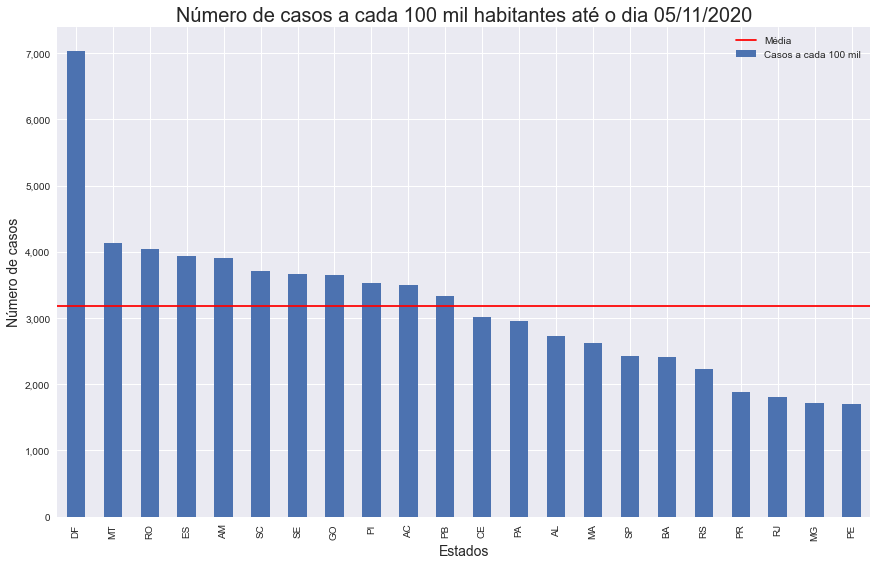

In [26]:
ax = situacao_atual_estado.sort_values('confirmed_per_100k_inhabitants', ascending=False).plot(kind='bar', x='state', y='confirmed_per_100k_inhabitants')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.axhline(y=situacao_atual_estado.confirmed_per_100k_inhabitants.mean(), color='r')

plt.ylabel("Número de casos",fontsize=14)
plt.xlabel("Estados", fontsize=14)
plt.title("Número de casos a cada 100 mil habitantes até o dia 05/11/2020", fontsize=20)
plt.legend(labels=['Média', "Casos a cada 100 mil"])
plt.show()


### O número de casos a cada 100 mil habitantes é um parâmetro que normaliza a discrepância de lugares muito povoados, no gráfico observamos o caso delicado do DF

In [27]:
obitos_a_cada_cem_mil = (situacao_atual_estado.deaths / situacao_atual_estado.estimated_population) * 100000
obitos_a_cada_cem_mil

date
2020-11-05     85.801625
2020-11-05     42.869221
2020-11-05     51.779449
2020-11-05    120.055126
2020-11-05    102.230268
2020-11-05     43.750419
2020-11-05     82.504632
2020-11-05     78.002519
2020-11-05     52.123033
2020-11-05     45.958787
2020-11-05    122.023509
2020-11-05     57.642048
2020-11-05     90.333185
2020-11-05    109.489381
2020-11-05     95.864915
2020-11-05    110.486583
2020-11-05     77.687170
2020-11-05     74.935700
2020-11-05     67.371954
2020-11-05     96.212646
2020-11-05     81.827594
2020-11-05     77.923239
dtype: float64

In [28]:
situacao_atual_estado['deaths_per_100k'] = obitos_a_cada_cem_mil
situacao_atual_estado.head()

,state,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k
date,,,,,,,,,,,
2020-11-05,SP,1125936,39717,253,True,45919049.0,46289333.0,35.0,2432.38761,0.0353,85.801625
2020-11-05,MG,364541,9128,241,True,21168791.0,21292666.0,31.0,1712.04959,0.0250,42.869221
2020-11-05,BA,359130,7731,243,True,14873064.0,14930634.0,29.0,2405.32318,0.0215,51.779449
2020-11-05,RJ,313843,20849,236,True,17264943.0,17366189.0,33.0,1807.20710,0.0664,120.055126
2020-11-05,CE,277072,9392,235,True,9132078.0,9187103.0,23.0,3015.87998,0.0339,102.230268


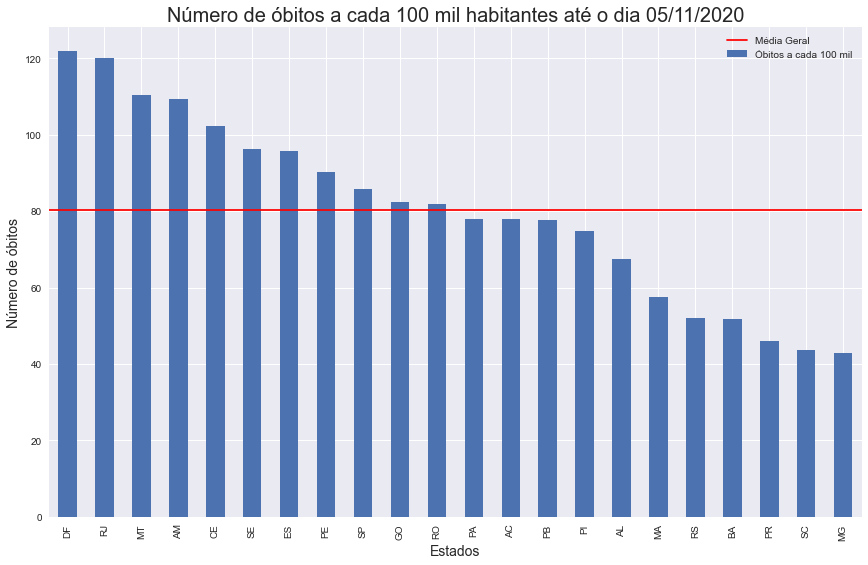

In [29]:
ax = situacao_atual_estado.sort_values("deaths_per_100k", ascending=False).plot(kind='bar', x='state', y='deaths_per_100k')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.axhline(y=situacao_atual_estado.deaths_per_100k.mean(), color='r')

plt.ylabel("Número de óbitos",fontsize=14)
plt.xlabel("Estados", fontsize=14)
plt.title("Número de óbitos a cada 100 mil habitantes até o dia 05/11/2020", fontsize=20)
plt.legend(labels=['Média Geral', "Óbitos a cada 100 mil"])
plt.show()

### Metade dos estados está acima da média
### A situação do Rio de Janeiro é crítica, tanto com o número de óbitos absoluto como relativos se consolidando o segundo maior nos dois casos, mesmo não tendo a mesma posição com relação ao número de casos confirmados
### Há duas hipóteses:
### 1. Os casos estão sendo mais subnotificados que no resto do país
### 2. A situação hospitalar no RJ é pior que nos demais estados

---

## Análise da taxa de letalidade dos estados

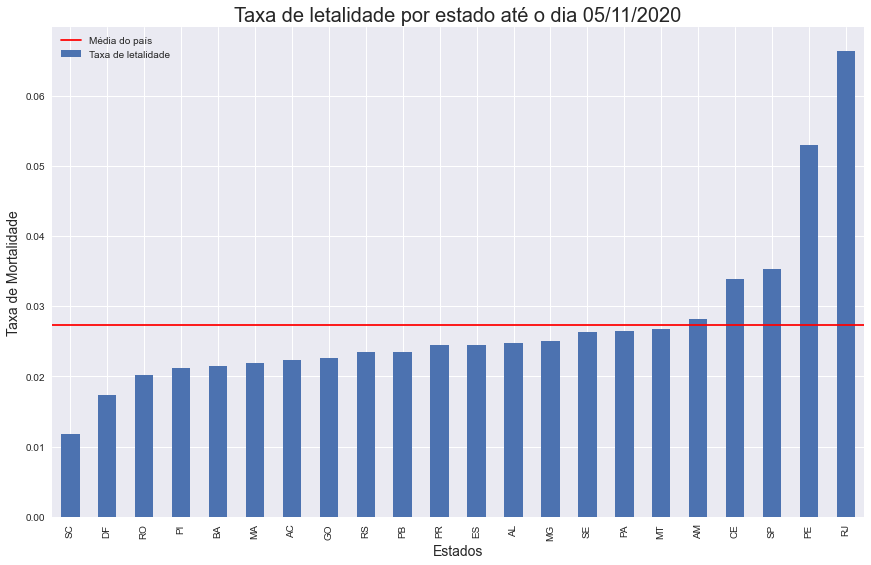

In [30]:
ax = situacao_atual_estado.sort_values('death_rate').plot(kind='bar', x='state', y='death_rate')
plt.axhline(y=situacao_atual_estado.death_rate.mean(), color='r')
plt.ylabel("Taxa de Mortalidade",fontsize=14)
plt.xlabel("Estados", fontsize=14)
plt.title("Taxa de letalidade por estado até o dia 05/11/2020", fontsize=20)
plt.legend(labels=["Média do país", "Taxa de letalidade"])
plt.show()

## Essa taxa de letalidade tão discrepante pode ter 2 fatores motivadores:
### 1. Pouco teste para confirmar a população doente, como resido no Rio, sei que os testes somente são feitos nos casos que procuram o hospital, logo somente são confirmados os casos mais graves
### 2. Se o número de testes for adequado, outra explicação é a capacidade de resposta do sistema de saúde para os casos mais graves

### Estados com as maiores taxas de mortalidade

In [31]:
situacao_atual_estado.sort_values('death_rate', ascending=False)[:5]

,state,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k
date,,,,,,,,,,,
2020-11-05,RJ,313843,20849,236,True,17264943.0,17366189.0,33.0,1807.20710,0.0664,120.055126
2020-11-05,PE,164222,8687,239,True,9557071.0,9616621.0,26.0,1707.68922,0.0529,90.333185
2020-11-05,SP,1125936,39717,253,True,45919049.0,46289333.0,35.0,2432.38761,0.0353,85.801625
2020-11-05,CE,277072,9392,235,True,9132078.0,9187103.0,23.0,3015.87998,0.0339,102.230268
2020-11-05,AM,164070,4607,234,True,4144597.0,4207714.0,13.0,3899.26692,0.0281,109.489381


In [32]:
for i in range(5):
    print("A taxa de letalidade do estado de(o) {} é de {:.2f}%.".format(situacao_atual_estado.sort_values('death_rate', ascending=False).state[i], situacao_atual_estado.sort_values('death_rate', ascending=False).death_rate[i] * 100))

A taxa de letalidade do estado de(o) RJ é de 6.64%.
A taxa de letalidade do estado de(o) PE é de 5.29%.
A taxa de letalidade do estado de(o) SP é de 3.53%.
A taxa de letalidade do estado de(o) CE é de 3.39%.
A taxa de letalidade do estado de(o) AM é de 2.81%.


### A taxa do RJ é quase o dobro dos estados de SP e CE, terceiro e quarto maiores.

---

## Uma analisada na evolução com o passar do tempo

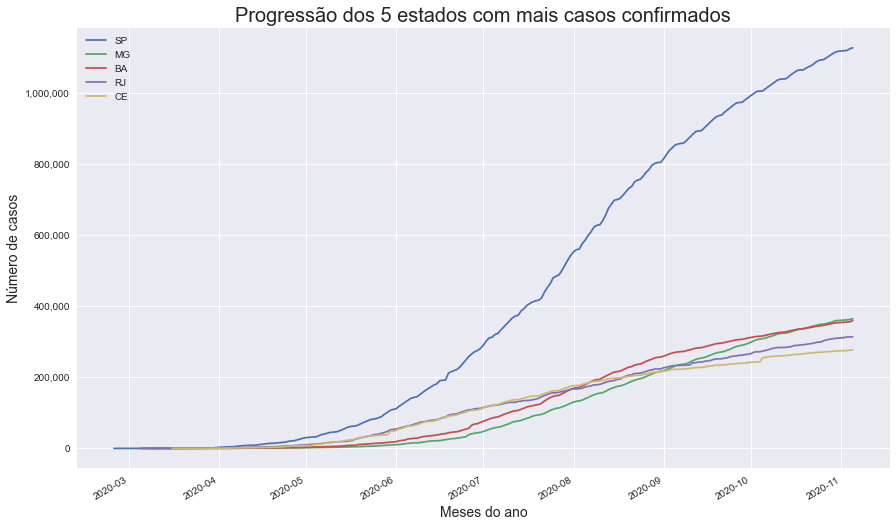

In [33]:
cinco_maiores = dados_estados.sort_values('confirmed', ascending=False).state.unique()[:5]
linhas=[]
fig, ax = plt.subplots()
for i in range(len(cinco_maiores)):
    ax = dados_estados[dados_estados.state == cinco_maiores[i]].confirmed.plot()
    linhas.append(ax)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.ylabel("Número de casos",fontsize=14)
plt.xlabel("Meses do ano", fontsize=14)
plt.title("Progressão dos 5 estados com mais casos confirmados", fontsize=20)
plt.legend(cinco_maiores)
plt.show()

### Por causa do número tão grande de SP, vou tirá-lo para poder ver os demais

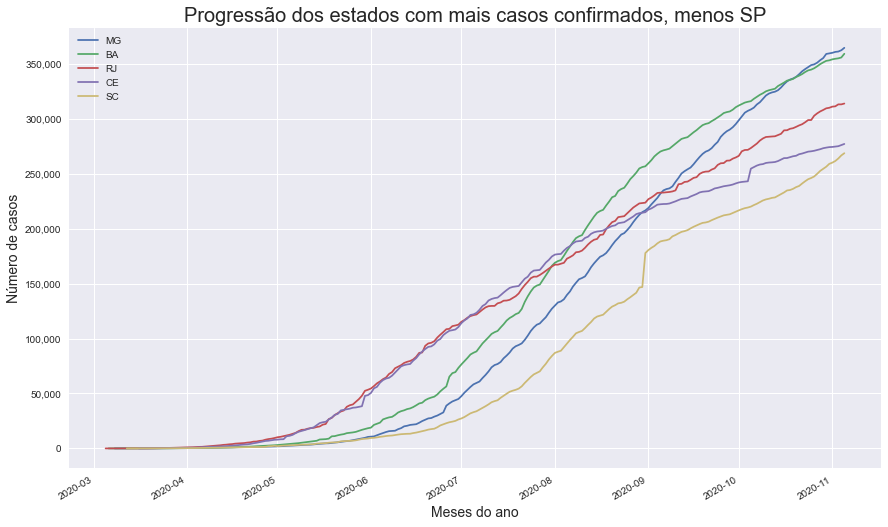

In [34]:
cinco_maiores_menos_SP = dados_estados.sort_values('confirmed', ascending=False).state.unique()[1:6]
linhas=[]
fig, ax = plt.subplots()
for i in range(len(cinco_maiores_menos_SP)):
    ax = dados_estados[dados_estados.state == cinco_maiores_menos_SP[i]].confirmed.plot()
    linhas.append(ax)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.ylabel("Número de casos",fontsize=14)
plt.xlabel("Meses do ano", fontsize=14)
plt.title("Progressão dos estados com mais casos confirmados, menos SP", fontsize=20)
plt.legend(cinco_maiores_menos_SP)
plt.show()

### Retirando SP a evolução de casos é muito parecida

---



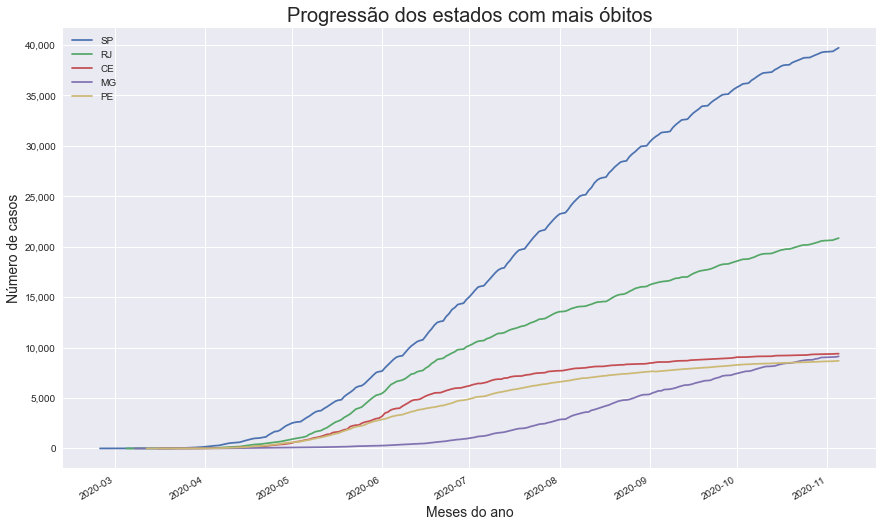

In [35]:
cinco_maiores_mortes = dados_estados.sort_values('deaths', ascending=False).state.unique()[:5]
linhas=[]
fig, ax = plt.subplots()
for i in range(len(cinco_maiores_mortes)):
    ax = dados_estados[dados_estados.state == cinco_maiores_mortes[i]].deaths.plot()
    linhas.append(ax)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.ylabel("Número de casos",fontsize=14)
plt.xlabel("Meses do ano", fontsize=14)
plt.title("Progressão dos estados com mais óbitos", fontsize=20)
plt.legend(cinco_maiores_mortes)
plt.show()

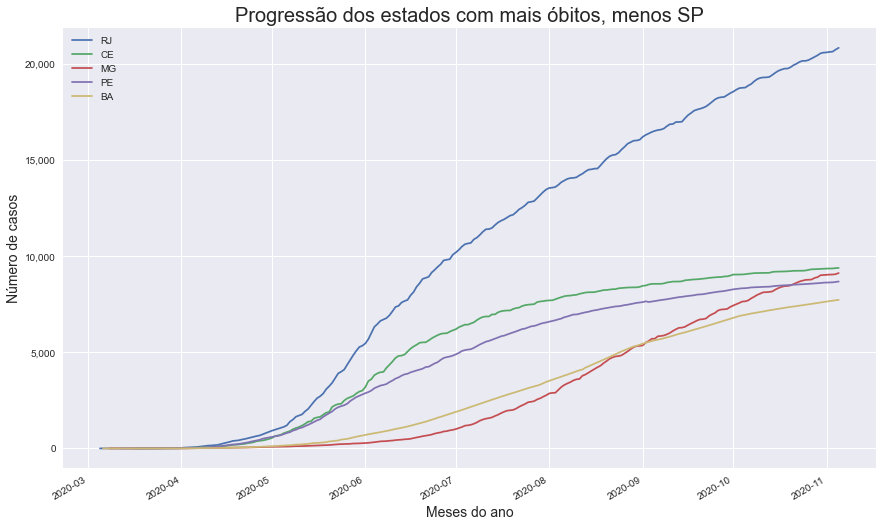

In [36]:
cinco_maiores_mortes_menos_sp = dados_estados.sort_values('deaths', ascending=False).state.unique()[1:6]
linhas=[]
fig, ax = plt.subplots()
for i in range(len(cinco_maiores_mortes)):
    ax = dados_estados[dados_estados.state == cinco_maiores_mortes_menos_sp[i]].deaths.plot()
    linhas.append(ax)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.ylabel("Número de casos",fontsize=14)
plt.xlabel("Meses do ano", fontsize=14)
plt.title("Progressão dos estados com mais óbitos, menos SP", fontsize=20)
plt.legend(cinco_maiores_mortes_menos_sp)
plt.show()

### A evolução do número de óbitos do RJ é muito mais aguda que os demais

---

## Casos por dia

### 1. Analizarei somente os 5 estados com mais casos

In [37]:
cinco_maiores

array(['SP', 'MG', 'BA', 'RJ', 'CE'], dtype=object)

In [38]:
dados_sp = dados_estados.query('state == "SP"')
dados_mg = dados_estados.query('state == "MG"')
dados_ba = dados_estados.query('state == "BA"')
dados_rj = dados_estados.query('state == "RJ"')
dados_ce = dados_estados.query('state == "CE"')

In [39]:
sp_casos_por_dia = dados_sp.confirmed.diff()
mg_casos_por_dia = dados_mg.confirmed.diff()
ba_casos_por_dia = dados_ba.confirmed.diff()
rj_casos_por_dia = dados_rj.confirmed.diff()
ce_casos_por_dia = dados_ce.confirmed.diff()

<AxesSubplot:xlabel='date'>

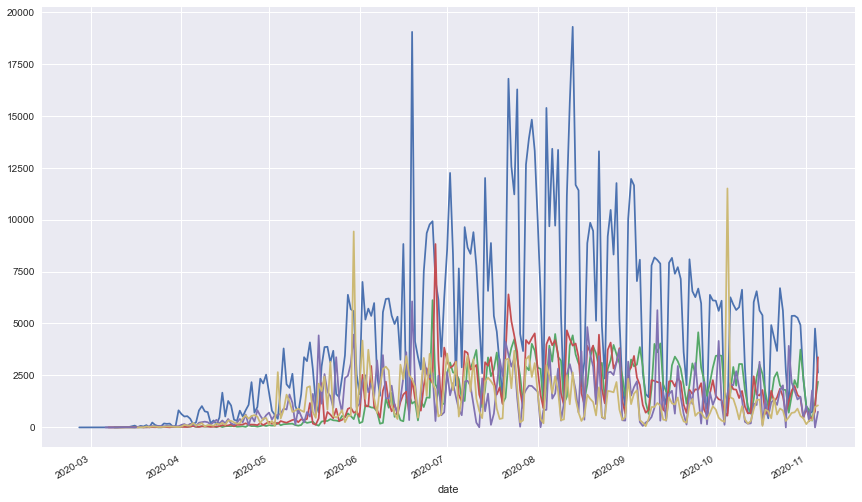

In [40]:
sp_casos_por_dia.plot()
mg_casos_por_dia.plot()
ba_casos_por_dia.plot()
rj_casos_por_dia.plot()
ce_casos_por_dia.plot()

### Muito confuso, melhor fazer só de um estado

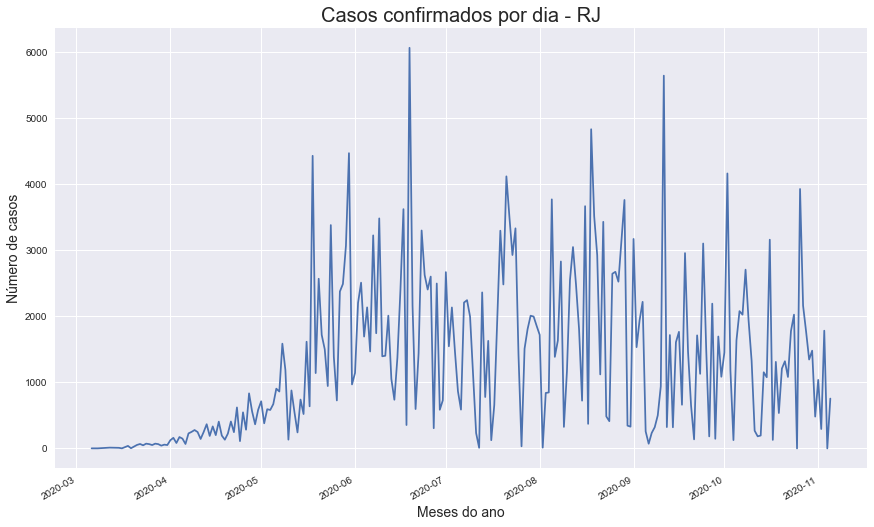

In [41]:
rj_casos_por_dia.plot()
plt.ylabel("Número de casos",fontsize=14)
plt.xlabel("Meses do ano", fontsize=14)
plt.title("Casos confirmados por dia - RJ", fontsize=20)
plt.show()

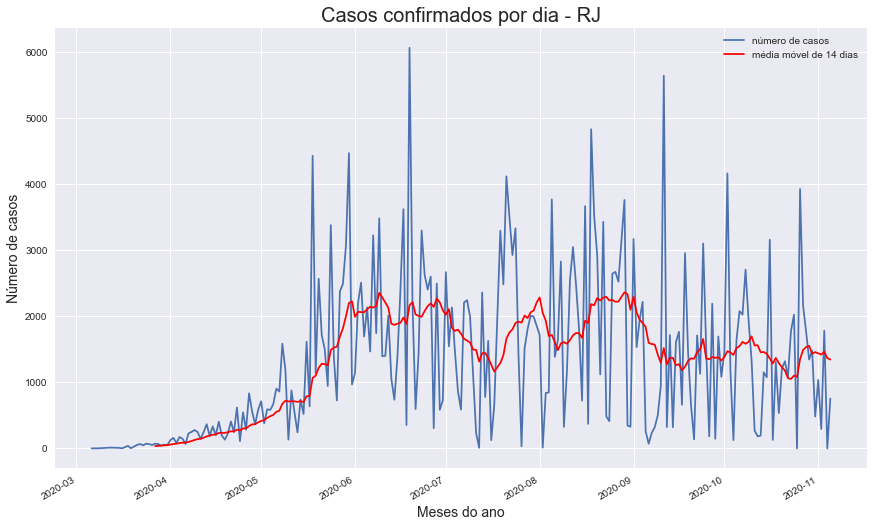

In [42]:
rj_casos_por_dia.plot()
rj_casos_por_dia.rolling(14).mean().plot(color='r')
plt.ylabel("Número de casos",fontsize=14)
plt.xlabel("Meses do ano", fontsize=14)
plt.title("Casos confirmados por dia - RJ", fontsize=20)
plt.legend(['número de casos', 'média móvel de 14 dias'])
plt.show()

---

## Observar os óbitos por dia

In [43]:
rj_mortes_por_dia = dados_rj.deaths.diff()

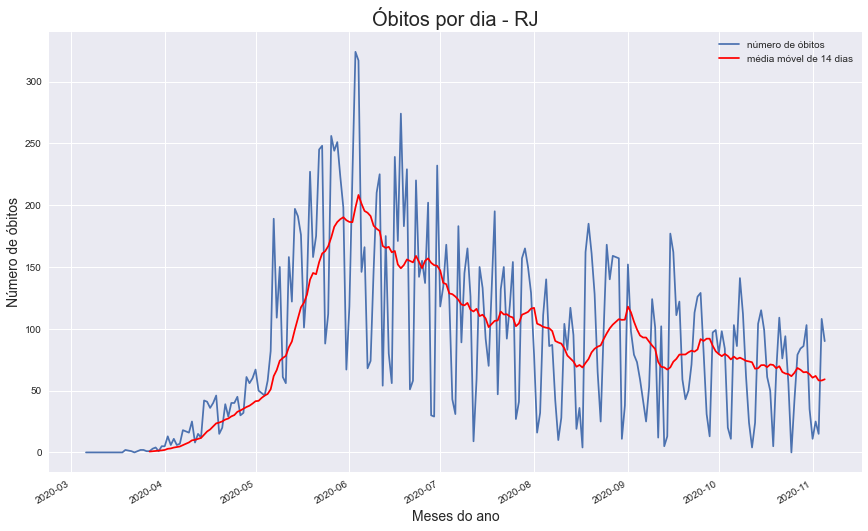

In [44]:
rj_mortes_por_dia.plot()
rj_mortes_por_dia.rolling(14).mean().plot(color='r')
plt.ylabel("Número de óbitos",fontsize=14)
plt.xlabel("Meses do ano", fontsize=14)
plt.title("Óbitos por dia - RJ", fontsize=20)
plt.legend(['número de óbitos', 'média móvel de 14 dias'])
plt.show()

### Nos gráficos de linha percebe-se um ruido muito grande com relação aos casos confirmados e de óbitos diários.
### Com o uso de média móvel podemos suavizar a amplitude grande

## Percebe-se que a situação foi pior no mês de junho

---

## Analisando os dados municipais

In [45]:
dados_municipios

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-11-05,AC,Acrelândia,city,492,11,211,True,15256.0,15490.0,1200013.0,3176.24274,0.0224
2020-11-04,AC,Acrelândia,city,492,11,210,False,15256.0,15490.0,1200013.0,3176.24274,0.0224
2020-11-03,AC,Acrelândia,city,492,11,209,False,15256.0,15490.0,1200013.0,3176.24274,0.0224
2020-11-02,AC,Acrelândia,city,492,10,208,False,15256.0,15490.0,1200013.0,3176.24274,0.0203
2020-11-01,AC,Acrelândia,city,492,10,207,False,15256.0,15490.0,1200013.0,3176.24274,0.0203
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000


In [46]:
dados_municipios = dados_municipios.sort_values('date')
dados_municipios.head()

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-02-25,SP,São Paulo,city,1,0,1,False,12252023.0,12325232.0,3550308.0,0.00811,0.0
2020-02-26,SP,São Paulo,city,1,0,2,False,12252023.0,12325232.0,3550308.0,0.00811,0.0
2020-02-27,SP,São Paulo,city,1,0,3,False,12252023.0,12325232.0,3550308.0,0.00811,0.0
2020-02-28,SP,São Paulo,city,2,0,4,False,12252023.0,12325232.0,3550308.0,0.01623,0.0
2020-02-29,SP,São Paulo,city,2,0,5,False,12252023.0,12325232.0,3550308.0,0.01623,0.0


In [47]:
municipios_rj = dados_municipios.query('state == "RJ"')
municipios_rj

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-03-05,RJ,Barra Mansa,city,1,0,1,False,184412.0,184833.0,3300407.0,0.54103,0.0000
2020-03-06,RJ,Rio de Janeiro,city,1,0,1,False,6718903.0,6747815.0,3304557.0,0.01482,0.0000
2020-03-06,RJ,Barra Mansa,city,1,0,2,False,184412.0,184833.0,3300407.0,0.54103,0.0000
2020-03-08,RJ,Barra Mansa,city,1,0,3,False,184412.0,184833.0,3300407.0,0.54103,0.0000
2020-03-08,RJ,Rio de Janeiro,city,2,0,2,False,6718903.0,6747815.0,3304557.0,0.02964,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,RJ,São José de Ubá,city,150,3,182,True,7171.0,7206.0,3305133.0,2081.59867,0.0200
2020-10-28,RJ,São Sebastião do Alto,city,88,4,184,True,9357.0,9387.0,3305307.0,937.46671,0.0455
2020-10-28,RJ,São Gonçalo,city,14706,781,216,True,1084839.0,1091737.0,3304904.0,1347.02772,0.0531


### Apareceu um dado estranho:
Importados/Indefinidos 	

In [48]:
municipios_rj.city.unique()

array(['Barra Mansa', 'Rio de Janeiro', 'Niterói', 'Guapimirim',
       'Miguel Pereira', 'Importados/Indefinidos', 'Petrópolis',
       'São Gonçalo', 'Volta Redonda', 'Campos dos Goytacazes',
       'Duque de Caxias', 'Resende', 'Valença', 'Belford Roxo',
       'Itaboraí', 'Mangaratiba', 'Nova Iguaçu', 'Rio das Ostras',
       'Maricá', 'Seropédica', 'Queimados', 'Rio Bonito',
       'São João de Meriti', 'Teresópolis', 'Angra dos Reis', 'Macaé',
       'São Pedro da Aldeia', 'Arraial do Cabo', 'Magé', 'Mesquita',
       'Itaguaí', 'Nilópolis', 'Três Rios', 'Iguaba Grande',
       'Barra do Piraí', 'Porciúncula', 'Araruama', 'Nova Friburgo',
       'Paraíba do Sul', 'Tanguá', 'São João da Barra', 'Itaperuna',
       'Trajano de Moraes', 'Japeri', 'Bom Jardim', 'Cabo Frio',
       'Casimiro de Abreu', 'Sapucaia', 'Porto Real', 'Quatis',
       'Rio das Flores', 'Paty do Alferes', 'Sumidouro', 'Paraty',
       'Cantagalo', 'São Francisco de Itabapoana', 'Cachoeiras de Macacu',
       

### Somente Importados/Indefinidos não é um município do estado do RJ, logo será removido

In [49]:
municipios_rj.query("city == 'Importados/Indefinidos'")

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-03-21,RJ,Importados/Indefinidos,city,4,0,1,False,NaN,NaN,NaN,NaN,0.0
2020-03-22,RJ,Importados/Indefinidos,city,2,0,2,False,NaN,NaN,NaN,NaN,0.0
2020-03-23,RJ,Importados/Indefinidos,city,2,0,3,False,NaN,NaN,NaN,NaN,0.0
2020-03-24,RJ,Importados/Indefinidos,city,2,0,4,False,NaN,NaN,NaN,NaN,0.0
2020-03-25,RJ,Importados/Indefinidos,city,0,0,5,False,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-24,RJ,Importados/Indefinidos,city,0,0,214,False,NaN,NaN,NaN,NaN,0.0
2020-10-25,RJ,Importados/Indefinidos,city,0,0,215,False,NaN,NaN,NaN,NaN,0.0
2020-10-26,RJ,Importados/Indefinidos,city,0,0,216,False,NaN,NaN,NaN,NaN,0.0


In [50]:
municipios_rj = municipios_rj[np.invert(municipios_rj.city_ibge_code.isna())]
municipios_rj.head()

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-03-05,RJ,Barra Mansa,city,1,0,1,False,184412.0,184833.0,3300407.0,0.54103,0.0
2020-03-06,RJ,Rio de Janeiro,city,1,0,1,False,6718903.0,6747815.0,3304557.0,0.01482,0.0
2020-03-06,RJ,Barra Mansa,city,1,0,2,False,184412.0,184833.0,3300407.0,0.54103,0.0
2020-03-08,RJ,Barra Mansa,city,1,0,3,False,184412.0,184833.0,3300407.0,0.54103,0.0
2020-03-08,RJ,Rio de Janeiro,city,2,0,2,False,6718903.0,6747815.0,3304557.0,0.02964,0.0


In [51]:
municipios_rj.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18192 entries, 2020-03-05 to 2020-10-28
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   state                           18192 non-null  object 
 1   city                            18192 non-null  object 
 2   place_type                      18192 non-null  object 
 3   confirmed                       18192 non-null  int64  
 4   deaths                          18192 non-null  int64  
 5   order_for_place                 18192 non-null  int64  
 6   is_last                         18192 non-null  bool   
 7   estimated_population_2019       18192 non-null  float64
 8   estimated_population            18192 non-null  float64
 9   city_ibge_code                  18192 non-null  float64
 10  confirmed_per_100k_inhabitants  18113 non-null  float64
 11  death_rate                      18192 non-null  float64
dtypes: bool(1), flo

<AxesSubplot:xlabel='city'>

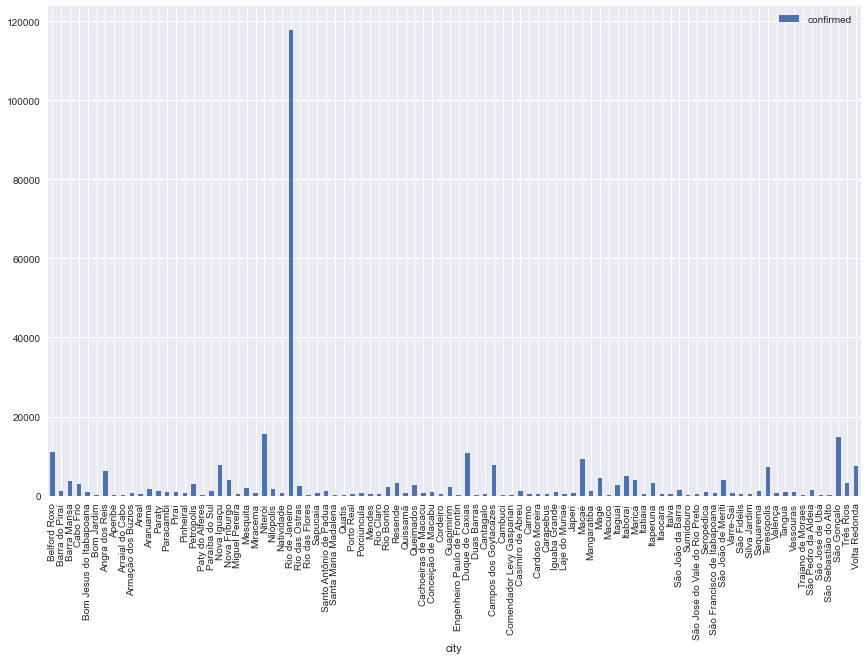

In [52]:
municipios_rj.query("is_last == True").plot(x='city', y='confirmed', kind='bar')

In [53]:
ultimo_dia_mun = municipios_rj.index[-1]
ultimo_dia_mun

Timestamp('2020-10-28 00:00:00')

## A data mais atual do estado do rio de janeiro separado por municípios é dia 28/10/2020, data diferente dos estados consolidados

In [54]:
consolidado_rj = municipios_rj.loc[ultimo_dia_mun]
consolidado_rj

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-10-28,RJ,Belford Roxo,city,11073,324,213,True,510906.0,513118.0,3300456.0,2157.98315,0.0293
2020-10-28,RJ,Barra do Piraí,city,1259,61,205,True,100374.0,100764.0,3300308.0,1249.45417,0.0485
2020-10-28,RJ,Barra Mansa,city,3602,177,226,True,184412.0,184833.0,3300407.0,1948.78620,0.0491
2020-10-28,RJ,Cabo Frio,city,2938,168,201,True,226525.0,230378.0,3300704.0,1275.29538,0.0572
2020-10-28,RJ,Bom Jesus do Itabapoana,city,847,23,198,True,37096.0,37203.0,3300605.0,2276.69812,0.0272
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,RJ,São José de Ubá,city,150,3,182,True,7171.0,7206.0,3305133.0,2081.59867,0.0200
2020-10-28,RJ,São Sebastião do Alto,city,88,4,184,True,9357.0,9387.0,3305307.0,937.46671,0.0455
2020-10-28,RJ,São Gonçalo,city,14706,781,216,True,1084839.0,1091737.0,3304904.0,1347.02772,0.0531


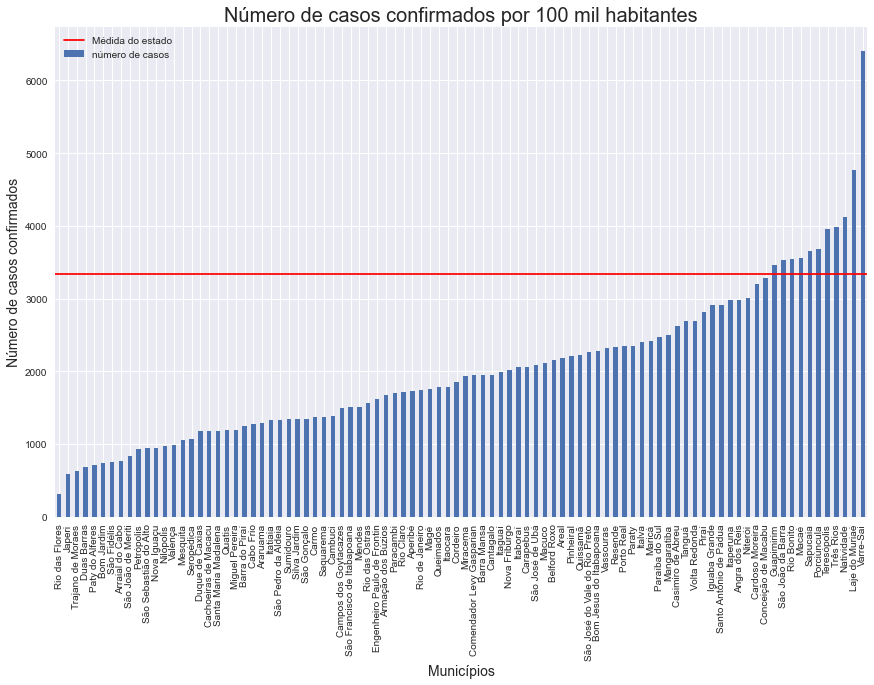

In [55]:
consolidado_rj.sort_values('confirmed_per_100k_inhabitants').plot(x= 'city',y='confirmed_per_100k_inhabitants', kind='bar')
plt.axhline(y=consolidado_rj.confirmed.mean(), color='r')
plt.ylabel("Número de casos confirmados",fontsize=14)
plt.xlabel("Municípios", fontsize=14)
plt.title("Número de casos confirmados por 100 mil habitantes", fontsize=20)
plt.legend(['Médida do estado', 'número de casos'])
plt.show()

## As 5 cidades que tem o número maior de casos confirmados a cada 100 mil habitantes são:

In [56]:
consolidado_rj.sort_values('confirmed_per_100k_inhabitants', ascending=False)[:5]

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-10-28,RJ,Varre-Sai,city,712,2,160,True,11000.0,11106.0,3306156.0,6410.94904,0.0028
2020-10-28,RJ,Laje do Muriaé,city,349,2,167,True,7355.0,7326.0,3302304.0,4763.85476,0.0057
2020-10-28,RJ,Natividade,city,631,5,170,True,15317.0,15311.0,3303104.0,4121.22004,0.0079
2020-10-28,RJ,Três Rios,city,3275,71,205,True,81804.0,82142.0,3306008.0,3986.99813,0.0217
2020-10-28,RJ,Teresópolis,city,7299,165,209,True,182594.0,184240.0,3305802.0,3961.68042,0.0226


## Em números absolutos, as 5 cidades que apresentaram mais casos confirmados são:

In [57]:
consolidado_rj.sort_values('confirmed', ascending=False)[:5]

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-10-28,RJ,Rio de Janeiro,city,117956,12009,225,True,6718903.0,6747815.0,3304557.0,1748.06215,0.1018
2020-10-28,RJ,Niterói,city,15488,500,223,True,513584.0,515317.0,3303302.0,3005.52864,0.0323
2020-10-28,RJ,São Gonçalo,city,14706,781,216,True,1084839.0,1091737.0,3304904.0,1347.02772,0.0531
2020-10-28,RJ,Belford Roxo,city,11073,324,213,True,510906.0,513118.0,3300456.0,2157.98315,0.0293
2020-10-28,RJ,Duque de Caxias,city,10839,783,215,True,919596.0,924624.0,3301702.0,1172.26029,0.0722


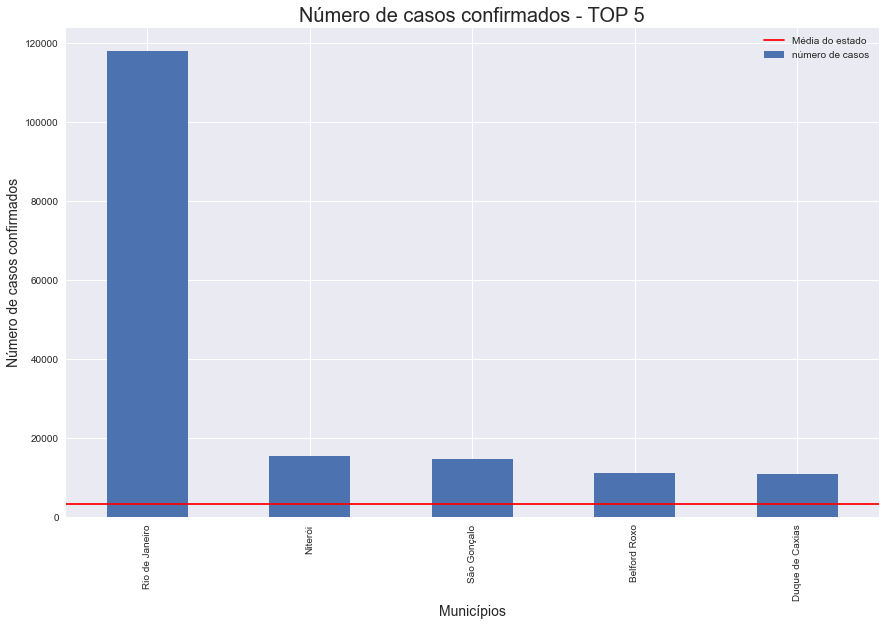

In [58]:
consolidado_rj.sort_values('confirmed', ascending=False)[:5].plot(x= 'city',y='confirmed', kind='bar')
plt.axhline(y=consolidado_rj.confirmed.mean(), color='r')
plt.ylabel("Número de casos confirmados",fontsize=14)
plt.xlabel("Municípios", fontsize=14)
plt.title("Número de casos confirmados - TOP 5", fontsize=20)
plt.legend(['Média do estado','número de casos'])
plt.show()

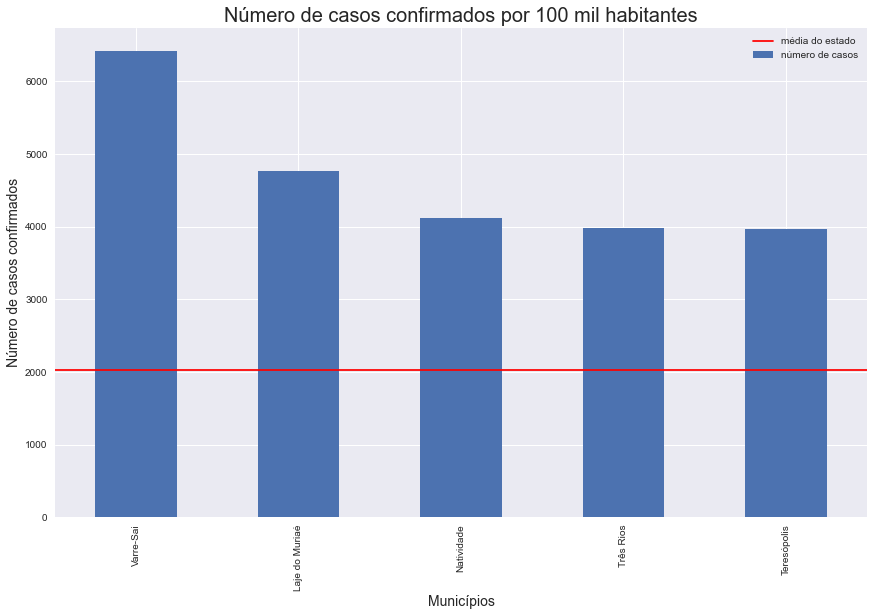

In [59]:
consolidado_rj.sort_values('confirmed_per_100k_inhabitants', ascending=False)[:5].plot(x= 'city',y='confirmed_per_100k_inhabitants', kind='bar')
plt.axhline(y=consolidado_rj.confirmed_per_100k_inhabitants.mean(), color='r')
plt.ylabel("Número de casos confirmados",fontsize=14)
plt.xlabel("Municípios", fontsize=14)
plt.title("Número de casos confirmados por 100 mil habitantes", fontsize=20)
plt.legend(['média do estado', 'número de casos'])
plt.show()

## Confirmando o cálculo para casos por 100 k

In [60]:
consolidado_rj['casos_por_100k'] = (consolidado_rj.confirmed / consolidado_rj.estimated_population) * 100000
consolidado_rj

<ipython-input-60-5a61a63de599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consolidado_rj['casos_por_100k'] = (consolidado_rj.confirmed / consolidado_rj.estimated_population) * 100000


,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,casos_por_100k
date,,,,,,,,,,,,,
2020-10-28,RJ,Belford Roxo,city,11073,324,213,True,510906.0,513118.0,3300456.0,2157.98315,0.0293,2157.983154
2020-10-28,RJ,Barra do Piraí,city,1259,61,205,True,100374.0,100764.0,3300308.0,1249.45417,0.0485,1249.454170
2020-10-28,RJ,Barra Mansa,city,3602,177,226,True,184412.0,184833.0,3300407.0,1948.78620,0.0491,1948.786202
2020-10-28,RJ,Cabo Frio,city,2938,168,201,True,226525.0,230378.0,3300704.0,1275.29538,0.0572,1275.295384
2020-10-28,RJ,Bom Jesus do Itabapoana,city,847,23,198,True,37096.0,37203.0,3300605.0,2276.69812,0.0272,2276.698116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,RJ,São José de Ubá,city,150,3,182,True,7171.0,7206.0,3305133.0,2081.59867,0.0200,2081.598668
2020-10-28,RJ,São Sebastião do Alto,city,88,4,184,True,9357.0,9387.0,3305307.0,937.46671,0.0455,937.466709
2020-10-28,RJ,São Gonçalo,city,14706,781,216,True,1084839.0,1091737.0,3304904.0,1347.02772,0.0531,1347.027718


## O Valor está certo

In [61]:
consolidado_rj = consolidado_rj.drop(columns = 'casos_por_100k')
consolidado_rj

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-10-28,RJ,Belford Roxo,city,11073,324,213,True,510906.0,513118.0,3300456.0,2157.98315,0.0293
2020-10-28,RJ,Barra do Piraí,city,1259,61,205,True,100374.0,100764.0,3300308.0,1249.45417,0.0485
2020-10-28,RJ,Barra Mansa,city,3602,177,226,True,184412.0,184833.0,3300407.0,1948.78620,0.0491
2020-10-28,RJ,Cabo Frio,city,2938,168,201,True,226525.0,230378.0,3300704.0,1275.29538,0.0572
2020-10-28,RJ,Bom Jesus do Itabapoana,city,847,23,198,True,37096.0,37203.0,3300605.0,2276.69812,0.0272
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,RJ,São José de Ubá,city,150,3,182,True,7171.0,7206.0,3305133.0,2081.59867,0.0200
2020-10-28,RJ,São Sebastião do Alto,city,88,4,184,True,9357.0,9387.0,3305307.0,937.46671,0.0455
2020-10-28,RJ,São Gonçalo,city,14706,781,216,True,1084839.0,1091737.0,3304904.0,1347.02772,0.0531


### Deixando o dataframe com as informações sem redundância

---

### Confirmar a forma de claculo da taxa da mortalidade

In [62]:
consolidado_rj['tx_mortalidade'] = (consolidado_rj.deaths / consolidado_rj.confirmed)
consolidado_rj

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,tx_mortalidade
date,,,,,,,,,,,,,
2020-10-28,RJ,Belford Roxo,city,11073,324,213,True,510906.0,513118.0,3300456.0,2157.98315,0.0293,0.029260
2020-10-28,RJ,Barra do Piraí,city,1259,61,205,True,100374.0,100764.0,3300308.0,1249.45417,0.0485,0.048451
2020-10-28,RJ,Barra Mansa,city,3602,177,226,True,184412.0,184833.0,3300407.0,1948.78620,0.0491,0.049139
2020-10-28,RJ,Cabo Frio,city,2938,168,201,True,226525.0,230378.0,3300704.0,1275.29538,0.0572,0.057182
2020-10-28,RJ,Bom Jesus do Itabapoana,city,847,23,198,True,37096.0,37203.0,3300605.0,2276.69812,0.0272,0.027155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,RJ,São José de Ubá,city,150,3,182,True,7171.0,7206.0,3305133.0,2081.59867,0.0200,0.020000
2020-10-28,RJ,São Sebastião do Alto,city,88,4,184,True,9357.0,9387.0,3305307.0,937.46671,0.0455,0.045455
2020-10-28,RJ,São Gonçalo,city,14706,781,216,True,1084839.0,1091737.0,3304904.0,1347.02772,0.0531,0.053108


### Forma de cálculo confirmado

In [63]:
consolidado_rj = consolidado_rj.drop(columns = 'tx_mortalidade')
consolidado_rj

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-10-28,RJ,Belford Roxo,city,11073,324,213,True,510906.0,513118.0,3300456.0,2157.98315,0.0293
2020-10-28,RJ,Barra do Piraí,city,1259,61,205,True,100374.0,100764.0,3300308.0,1249.45417,0.0485
2020-10-28,RJ,Barra Mansa,city,3602,177,226,True,184412.0,184833.0,3300407.0,1948.78620,0.0491
2020-10-28,RJ,Cabo Frio,city,2938,168,201,True,226525.0,230378.0,3300704.0,1275.29538,0.0572
2020-10-28,RJ,Bom Jesus do Itabapoana,city,847,23,198,True,37096.0,37203.0,3300605.0,2276.69812,0.0272
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-28,RJ,São José de Ubá,city,150,3,182,True,7171.0,7206.0,3305133.0,2081.59867,0.0200
2020-10-28,RJ,São Sebastião do Alto,city,88,4,184,True,9357.0,9387.0,3305307.0,937.46671,0.0455
2020-10-28,RJ,São Gonçalo,city,14706,781,216,True,1084839.0,1091737.0,3304904.0,1347.02772,0.0531


### Deixando o dataframe com as informações sem redundância

---

## Observar a taxa de mortalidade nos municípios

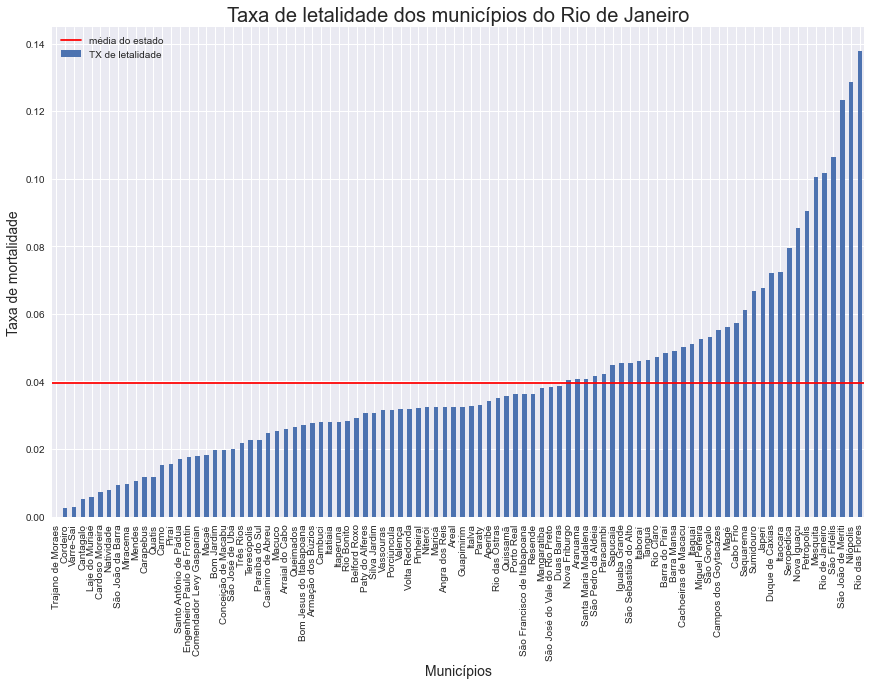

In [64]:
consolidado_rj.sort_values('death_rate').plot(x= 'city',y='death_rate', kind='bar')
plt.axhline(y=consolidado_rj.death_rate.mean(), color='r')
plt.ylabel("Taxa de mortalidade",fontsize=14)
plt.xlabel("Municípios", fontsize=14)
plt.title("Taxa de letalidade dos municípios do Rio de Janeiro", fontsize=20)
plt.legend(['média do estado', 'TX de letalidade'])
plt.show()

## Essa taxa de letalidade tão discrepante pode ter 2 fatores motivadores:
### 1. Pouco teste para confirmar a população doente, como resido no Rio, sei que os testes somente são feitos nos casos que procuram o hospital, logo somente são confirmados os casos mais graves
### 2. Se o número de testes for adequado, outra explicação é a capacidade de resposta do sistema de saúde para os casos mais graves

In [65]:
consolidado_rj.sort_values('death_rate', ascending=False)[:5]

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-10-28,RJ,Rio das Flores,city,29,4,200,True,9284.0,9344.0,3304508.0,310.35959,0.1379
2020-10-28,RJ,Nilópolis,city,1577,203,205,True,162485.0,162693.0,3303203.0,969.31030,0.1287
2020-10-28,RJ,São João de Meriti,city,3922,483,209,True,472406.0,472906.0,3305109.0,829.34029,0.1232
2020-10-28,RJ,São Fidélis,city,291,31,196,True,38669.0,38710.0,3304805.0,751.74374,0.1065
2020-10-28,RJ,Rio de Janeiro,city,117956,12009,225,True,6718903.0,6747815.0,3304557.0,1748.06215,0.1018


In [66]:
for i in range(5):
    print("A taxa de letalidade do município de {} é de {:.2f}%.".format(consolidado_rj.sort_values('death_rate', ascending=False).city[i], consolidado_rj.sort_values('death_rate', ascending=False).death_rate[i] * 100))

A taxa de letalidade do município de Rio das Flores é de 13.79%.
A taxa de letalidade do município de Nilópolis é de 12.87%.
A taxa de letalidade do município de São João de Meriti é de 12.32%.
A taxa de letalidade do município de São Fidélis é de 10.65%.
A taxa de letalidade do município de Rio de Janeiro é de 10.18%.


### Essas taxas estã muito acima do obtido no país

#### taxa média do país no mesmo dia do município

In [67]:
print("A média da taxa do país é {:.2f}%.".format(dados_estados.loc[consolidado_rj.index[-1]].death_rate.mean() * 100))

A média da taxa do país é 2.57%.


In [68]:
print("A taxa do estado é {:.2f}%.".format(dados_estados.loc[consolidado_rj.index[-1]].query('state == "RJ"').death_rate[0] * 100))

A taxa do estado é 6.64%.


In [69]:
print("A média da taxa do estado é {:.2f}%.".format(consolidado_rj.death_rate.mean() * 100))

A média da taxa do estado é 3.95%.


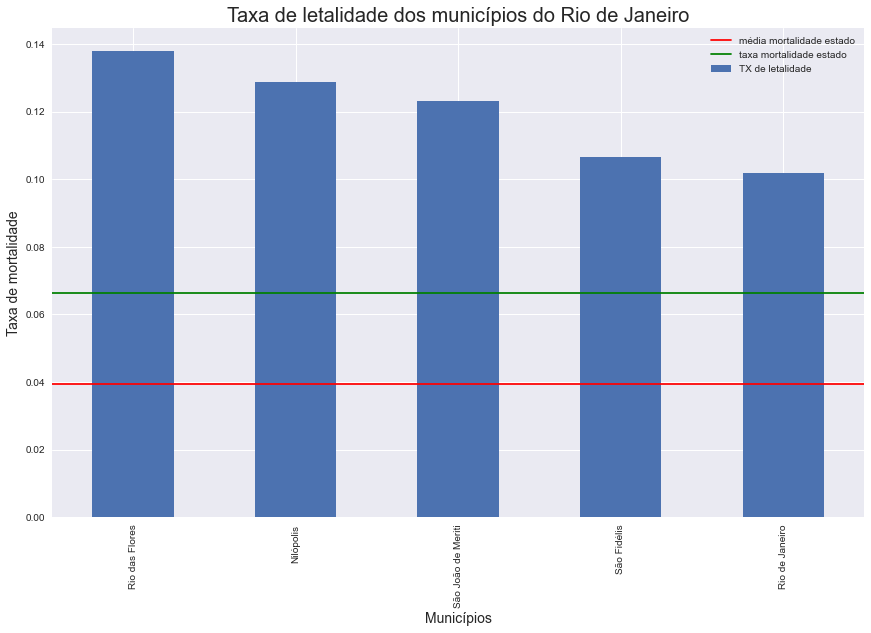

In [70]:
consolidado_rj.sort_values('death_rate',ascending=False)[:5].plot(x= 'city',y='death_rate', kind='bar')
plt.axhline(y=consolidado_rj.death_rate.mean(), color='r')
plt.axhline(y=dados_estados.loc[consolidado_rj.index[-1]].query('state == "RJ"').death_rate[0], color='g')

plt.ylabel("Taxa de mortalidade",fontsize=14)
plt.xlabel("Municípios", fontsize=14)
plt.title("Taxa de letalidade dos municípios do Rio de Janeiro", fontsize=20)
plt.legend(['média mortalidade estado', 'taxa mortalidade estado', 'TX de letalidade'])
plt.show()

# Por que esses números são diferentes?